In [1]:
import model
import numpy as np
import random
from utils import simple_graph
import tank
import truck


import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
# Tanks' information
n = 5 
tank_ids = list(range(1,n+1))
tank_max_loads =  np.array([100., 100., 200., 300., 400.])
tank_current_loads =  np.array([50., 60., 120., 150., 300.])
tank_consumption_rates =  np.array([10.] * n)

n_discrete_load_levels = np.array([5,5,10,10,10])

# Trucks' information
k = 2
truck_ids = list(range(k))
truck_max_loads = np.array([20., 50.])
truck_current_loads = truck_max_loads.copy()
truck_current_positions =  np.array([0] * k)
#truck_fractions_deliverable =  np.array([1.] * k) # we for now we only allow to deliver all the content of the truck
truck_fractions_deliverable =  np.array([ np.array([0.5, 1.]), 
                                          np.array([0.5, 1.])
                                        ]) # we for now we only allow to deliver all the content of the truck
n_discrete_load_levels_trucks = np.array([2,2])

# System's information
def simple_graph(n: int):    
    A = np.zeros((n,n))
    A[0,0:n] = 1
    A = A.astype(int)
    return(A)

graph = simple_graph(n+1)
tanks = [tank.Tank( tank_id, current_load, max_load, consumption_rate, n_lvls) 
         for  tank_id, current_load, max_load, consumption_rate, n_lvls in 
         zip( tank_ids, tank_current_loads, tank_max_loads, tank_consumption_rates, n_discrete_load_levels)]
trucks = [truck.Truck( truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls) 
         for  truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls in 
         zip(truck_ids, truck_current_loads, truck_max_loads, truck_current_positions, 
             truck_fractions_deliverable, n_discrete_load_levels_trucks)]

def simple_weights(n: int, w: float):    
    W = np.full((n,n), np.inf)
    W[0,:] = w
    return(W)
w =  np.array([0, 20., 10., 30., 50.5, 45.])

weights_matrix = simple_weights(n+1, w)




In [3]:
toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)

self.trucks [<truck.Truck object at 0x7f380637fef0>, <truck.Truck object at 0x7f380637ff28>]
Final rewards:  -110.0
self.trucks [<truck.Truck object at 0x7f380637fef0>, <truck.Truck object at 0x7f380637ff28>]
Final rewards:  -60.0
self.trucks [<truck.Truck object at 0x7f380637fef0>, <truck.Truck object at 0x7f380637ff28>]
Final rewards:  -120.5
self.trucks [<truck.Truck object at 0x7f380637fef0>, <truck.Truck object at 0x7f380637ff28>]
Final rewards:  -95.0
self.trucks [<truck.Truck object at 0x7f380637fef0>, <truck.Truck object at 0x7f380637ff28>]
Final rewards:  -95.5
self.trucks [<truck.Truck object at 0x7f380637fef0>, <truck.Truck object at 0x7f380637ff28>]
Final rewards:  -130.5
self.trucks [<truck.Truck object at 0x7f380637fef0>, <truck.Truck object at 0x7f380637ff28>]
Final rewards:  -65.0
self.trucks [<truck.Truck object at 0x7f380637fef0>, <truck.Truck object at 0x7f380637ff28>]
Final rewards:  -90.0
self.trucks [<truck.Truck object at 0x7f380637fef0>, <truck.Truck object at 0

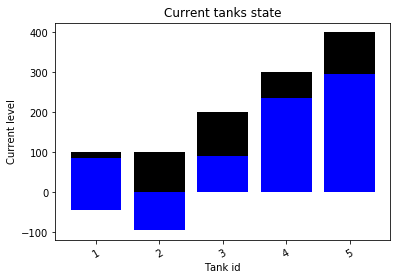

In [4]:
# Simulation
%matplotlib inline

seed = None 

iterations = 50
visualization_steps = []
rewards_list = []

for it in range(iterations):
    rewards = toy_system.random_action(seed);
    rewards_list.append(rewards)
    #print(toy_system.state())
    print("Final rewards: ", rewards);
    toy_system.reset_trucks_positions();
    visualization_steps.append(toy_system.visualize());

In [5]:
visualization_steps[0][2]

[40.0, 60.0, 110.0, 190.0, 290.0]

In [6]:
visualization_steps[0][0]+1

array([1, 2, 3, 4, 5])

In [7]:
visualization_steps;

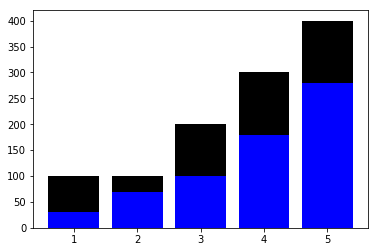

In [8]:
def barlist(n): 
    return visualization_steps[n][2]

fig=plt.figure()

N=iterations #Number of frames
x=visualization_steps[0][0]+1

plt.bar(x,visualization_steps[0][1], color = 'black')
barcollection = plt.bar(x,barlist(0), color = 'blue')

def animate(i):
    y=barlist(i+1)
    for i, b in enumerate(barcollection):
        b.set_height(y[i])

anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=N-1,
                             interval=100)
HTML(anim.to_html5_video())
#anim.save('mymovie.mp4',writer=animation.FFMpegWriter(fps=10))
#plt.show()

In [9]:
#toy_system.visualize_step(visualization_steps[2]);

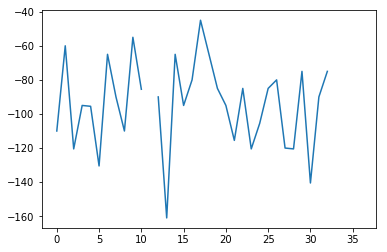

In [10]:
%matplotlib inline
plt.plot(range(iterations),rewards_list)

In [11]:
toy_system.n_states()

3600000

In [12]:
n_s = ((n+1)**k)
a = np.prod(n_discrete_load_levels)
b = np.prod(n_discrete_load_levels_trucks)
n_s = n_s *a *b
n_s

3600000

# Small system to apply Q-learning algorithm


In [13]:
# Tanks' information
n = 5 
tank_ids = list(range(1,n+1))
tank_max_loads =  np.array([100., 100., 200., 300., 400.])
tank_current_loads =  np.array([50., 60., 120., 150., 300.])
tank_consumption_rates =  np.array([10.] * n)

n_discrete_load_levels = np.array([2,2,2,2,2])

# Trucks' information
k = 2
truck_ids = list(range(k))
truck_max_loads = np.array([20., 50.])
truck_current_loads = truck_max_loads.copy()
truck_current_positions =  np.array([0] * k)
#truck_fractions_deliverable =  np.array([1.] * k) # we for now we only allow to deliver all the content of the truck
truck_fractions_deliverable =  np.array([ np.array([0.5, 1.]), 
                                          np.array([0.5, 1.])
                                        ]) # we for now we only allow to deliver all the content of the truck
n_discrete_load_levels_trucks = np.array([2,2])

# System's information
def simple_graph(n: int):    
    A = np.zeros((n,n))
    A[0,0:n] = 1
    A = A.astype(int)
    return(A)

graph = simple_graph(n+1)
tanks = [tank.Tank( tank_id, current_load, max_load, consumption_rate, n_lvls) 
         for  tank_id, current_load, max_load, consumption_rate, n_lvls in 
         zip( tank_ids, tank_current_loads, tank_max_loads, tank_consumption_rates, n_discrete_load_levels)]
trucks = [truck.Truck( truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls) 
         for  truck_id, current_load, max_load, current_position, load_fractions_deliverable, n_lvls in 
         zip(truck_ids, truck_current_loads, truck_max_loads, truck_current_positions, 
             truck_fractions_deliverable, n_discrete_load_levels_trucks)]

def simple_weights(n: int, w: float):    
    W = np.full((n,n), np.inf)
    W[0,:] = w
    return(W)
w =  np.array([0, 20., 10., 30., 50.5, 45.])

weights_matrix = simple_weights(n+1, w)

toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)

a_s_dim = toy_system.states_dim * toy_system.actions_dim
a_s_dim

46080

In [14]:
toy_system.discrete_state()



rewards = toy_system.random_action(seed);
rewards_list.append(rewards)
#prnt(toy_system.state())
print("Final rewards: ", rewards);
toy_system.reset_trucks_positions();

toy_system.da

self.trucks [<truck.Truck object at 0x7f37fdecc518>, <truck.Truck object at 0x7f37fdecc550>]
Final rewards:  -110.0


[[2, 3], [1, 1]]

In [15]:
toy_system.ds

[[2, 3], [1, 1], [0, 0, 1, 1, 1]]

In [16]:
a = [[3, 4], [1, 1], [0, 0, 1, 0, 1]]
aa= ''.join(str(''.join(str(y) for y in x)) for x in a)

In [17]:
print(toy_system.ds)
print(toy_system.da)

[[2, 3], [1, 1], [0, 0, 1, 1, 1]]
[[2, 3], [1, 1]]


In [18]:
sa_new = toy_system.state_action_to_string()
sa_new

'2311001112311'

In [19]:
new_dict = {}
new_dict[sa_new] = {"qval": 1}

In [20]:
new_dict[sa_new]['qval']

1

## Off-policy algorithm

In [32]:
learning_rate0 = 0.05
learning_rate_decay = 0.1
n_iterations = 2
discount_rate = 0.95

toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)

Q = {}

def is_key(dic, key):
    if key in dic:
        return(True)
    else: return(False)

is_key(new_dict, sa_new)

state_length = 2*k + n

In [35]:
import pickle

def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [36]:
# "Train zone". Q-values are being converging to the optimal, theoretically

for iteration in range(n_iterations):
    reward = toy_system.random_action()
    sa_current = toy_system.state_action_to_string()
    
    if is_key(Q, sa_current) == False:
        Q[sa_current] = 0
        
    learning_rate = learning_rate0 / (1+iteration*learning_rate_decay)
    
    Q_max = max([Q[key] for key in Q.keys() if key.startswith(sa_current[0:state_length])])
    
    Q[sa_current] = ( (1-learning_rate) * Q[sa_current] 
                     + learning_rate* (reward + discount_rate * Q_max)
                    )
    
    toy_system.reset_trucks_positions();

    
save_obj(Q, "Q-dict")   


self.trucks [<truck.Truck object at 0x7f37fdecc518>, <truck.Truck object at 0x7f37fdecc550>]
self.trucks [<truck.Truck object at 0x7f37fdecc518>, <truck.Truck object at 0x7f37fdecc550>]


In [37]:
# Optimal policy using the Q values trained previously:
Q = load_obj("Q-dict")
    
Q.keys()

toy_system.ds
toy_system.da

[[0, 4], [1, 0]]

In [24]:


new_keys = new_dict.keys()

In [25]:
[Q[key] for key in new_keys if key.startswith(sa_new[0:2])]

KeyError: '2311001112311'

In [ ]:
toy_system.ds

In [ ]:
toy_system.da

In [ ]:
max([1,2,3])

In [ ]:
[1,2,3][0:3]

In [ ]:
Q['3311-1-1']

#ESTA MAL LO DE DISCRETIZAR LAS CAPACITIES

In [ ]:
test_toy_system = model.System(tanks = tanks, trucks = trucks, adjacency_matrix = graph, weights_matrix = weights_matrix)


### To do

1. Función que permita aplicar una acción al sistema usando el godigo de números enteros (como en las keys de los dicts)

2. Hacer una simulación que vaya aplicando, en cada estado, la accion con mayor Q-value en el diccionario Q.

3. Visualizar como evoluciona el sistema con la optimal policy estimada con alguna random